# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll be analyzing the information in the TMDb movie dataset obtained [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv), which covers films released between the years 1960 and 2015. Specifically, I want to ask what genres of film are most popular, and what relationship may exist between budget, revenue, and popularity score.

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
First, let's load the dataset and look at the first few rows of information.

In [2]:
# Load the data and print out a few lines
df = pd.read_csv('tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Return the general size of the dataset
df.shape

(10866, 21)

In [4]:
# Examine columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

After the first 2 columns of ID values, this dataset has 19 columns of information about the selected films - popularity, budget, revenue, movie title, cast, web page, director, the advertising tagline, relevant keywords, overview, runtime (in minutes), movie genres, production companies, release date, vote count, average vote, release year, budget adjusted for inflation, and revenue adjusted for inflation, in terms of 2010 dollars.

Out of all these columns, the best dependent variables to study would most likely be 1) adjusted revenue, and 2) popularity. In fact, it might be interesting to compare popularity and adjusted revenue to each other, and see whether the two factors correlate.

However - TheMovieDb defines the popularity for movies [here](https://developers.themoviedb.org/3/getting-started/popularity). Because a movie's popularity within the database can fluctuate on a day-to-day basis, this could be highly variable, and the results of an analysis may differ greatly from the box office revenue of the films at the time of their release.

There is information on 10,866 films in the database, but judging by the variation in number of non-null rows in each column, some values are missing. For example, there seem to be a lot of missing values in the 'homepage' column. Unless I want to do some in-depth analysis on the relationship between a film having a web site and its popularity, it might be a good choice to drop the 'homepage' column altogether later on.

But before we jump to any conclusions, it would be best to check the number of values in each column.

In [5]:
# Check for null values across all columns
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

So it seems there are a few null values in the 'imdb_id', 'cast', 'director', 'overview' and 'genres' columns, and a lot of null values in the 'homepage', 'tagline', 'keywords', and 'production_companies' columns.

The sheer number of missing values for 'homepage' means it would be difficult to make comparisons with the information in this column across the entire dataset. The number of missing values in the 'tagline' column, combined with the fact that this is simple anaylsis work and not natural language processing, means that this column may also not be helpful for the purposes of this study.

In [6]:
# Check for duplicate rows
df.duplicated().sum()

1

And there's one duplicated row in the dataset, which will need to be removed. Now, let's have a quick look at what some numerical (non-string) information in the dataset can tell us.

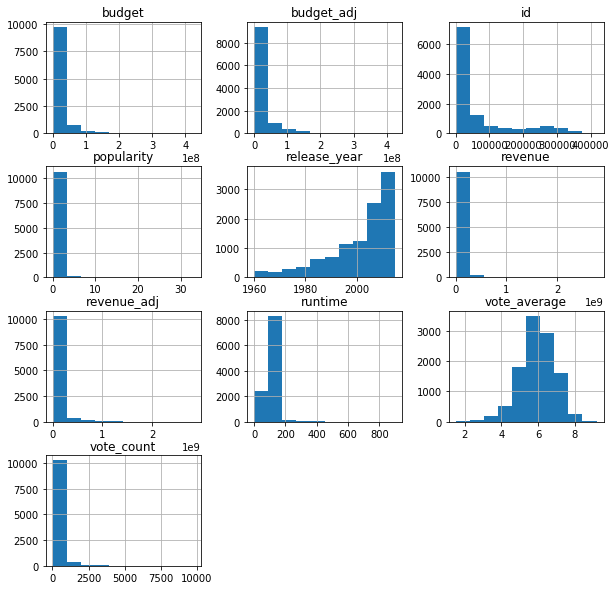

In [7]:
# Look for trends in numerical data
df.hist(figsize=(10, 10));

A few interesting things can be taken from these histograms. First, the difference between actual film budgets and revenue, and budgets and revenue adjusted for inflation, is relatively small, but still large enough to be noticeable at a glance. Also, film budgets and revenues adjusted for inflation have more of a right-skewed distribution. This might suggest that modern films overall have become more expensive to make, and take in more revenue, than they did in previous decades.

What's more, the 'release_year' column shows that the great majority of the films in the dataset were released after 2000, and the number of films multiplies dramatically as time goes on - the final bar in the histogram is more than twice the height of the bar that falls in the year 2000 range. This could either mean that more recent films simply have better representation in the dataset, or that there has been a very large increase in the number of films being made in recent decades.

Finally, the general opinion of the reviewers on TMDb seems to be average-to-favorable; the largest bins in the 'vote_average' column across the number of film entries fall into the 50-70% approval range.

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The films present in the dataset indeed come from 1960-2015, but the 25th percentile were released around 1995, the 50th percentile around 2006, and the 75th percentile around 2011, so the last two decades of film are overwhelmingly represented.

The mean of the average vote is 5.97, which supports the intuition provided by the 'vote_average' histogram; the smallest rating in votes a film has gotten is 1.5, and the largest is 9.2. The smallest vote count any film has received is 10, the largest number is 9,767, and the mean number of votes per film is 217.

The un-adjusted budgets for the films in the dataset run from 0 to 425,000,000 dollars, and the average cost is 14,625,700. The un-adjusted revenue runs from 0 to 2,781,506,000 dollars, with an average of 39,823,320, so it would seem that the films represented here generally make back twice the money they cost - though some outliers cost exorbitant amounts of money to make, and some are fantastically more financially successful than the average.

However, the adjusted budget for the films in the dataset has an average of 17,551,040, though the maximum is almost identical to the non-adjusted budget. The average adjusted revenue for the films in the dataset is 51,364,360, while the maxiumum adjusted revenue is 2,827,124,000. This would suggest that, historically speaking, a good number of films in previous decades cost more to make, and made significantly more money at the box office, than modern films commonly do - which counters the visual testimony that the histograms seem to give!

For simplicity's sake, I plan to stick with adjusted budget and revenue to make comparisons between columns of the dataset, which will prevent monetary inflation from skewing the conclusions.

### Data Cleaning

Now that the preliminary data exploration has been done, it's time to take out superfluous columns, fill the remaining null values, and drop the single duplicate row. Because I've chosen to use 'adj_budget' and 'adj_revenue' exclusively, 'budget' and 'revenue' will be among the columns that get removed.

In [9]:
# Drop the unnecessary columns, and check the shape of the resulting dataset
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'homepage', 
         'tagline', 'overview', 'runtime'], axis=1, inplace=True)
df.shape

(10866, 13)

The ID and IMDb ID columns are removed here, because they aren't useful identifiers for the intended analysis. The same is true for 'homepage', 'tagline', and 'overview', for the reasons discussed above. 'Runtime' is also not terribly useful for the questions I plan to ask of the data, so that goes too.

In [10]:
# Drop the duplicate values, and check to ensure the removal was successful
df.drop_duplicates(inplace=True)
df.shape

(10865, 13)

It looks like the duplicate value was also removed successfully. Now, to take care of the remaining null values, and to replace the zero values in the remaining columns of numerical data.

In [11]:
# Drop rows with null values in selected columns
df.dropna(subset=['cast', 'director', 'genres'], inplace=True)

# Replace the null values in columns containing strings
df.keywords.fillna('Unknown', inplace=True)
df.production_companies.fillna('Unknown', inplace=True)

df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
keywords                0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [12]:
# Replace the zeroes in the budget and revenue columns with the non-zero averages
df.loc[df.budget_adj==0,'budget_adj'] = df.loc[df.budget_adj!=0,'budget_adj'].median()
df.loc[df.revenue_adj==0,'revenue_adj'] = df.loc[df.revenue_adj!=0,'revenue_adj'].median()
df.describe()

,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,219.812972,5.964710,2001.259622,2.965769e+07,7.616442e+07
std,1.004804,578.815324,0.930283,12.820151,2.993339e+07,1.382591e+08
min,0.000188,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,17.000000,5.400000,1995.000000,2.287867e+07,4.402879e+07
50%,0.387081,39.000000,6.000000,2006.000000,2.287867e+07,4.402879e+07
75%,0.720889,148.000000,6.600000,2011.000000,2.287867e+07,4.402879e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


And that's all been taken care of! Because the number of films with null values for 'cast', 'director' and 'genres' was quite small, the rows related to those films may not contribute much to the overall data analysis, and so have been dropped from the new dataframe.

And at last, we can begin asking questions of the dataset. To recap, I plan to ask: Which genres are most popular over time? And what is the relationship between film budget, box office revenue, and popularity score?

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Which genres of film are most popular from year to year?

To answer this question, we first need to know how many categories of genre exist. The visuals of the dataset show that each listed film can have multiple genres, so first we should separate the genre categories and compile them in a list to get a better look at them.

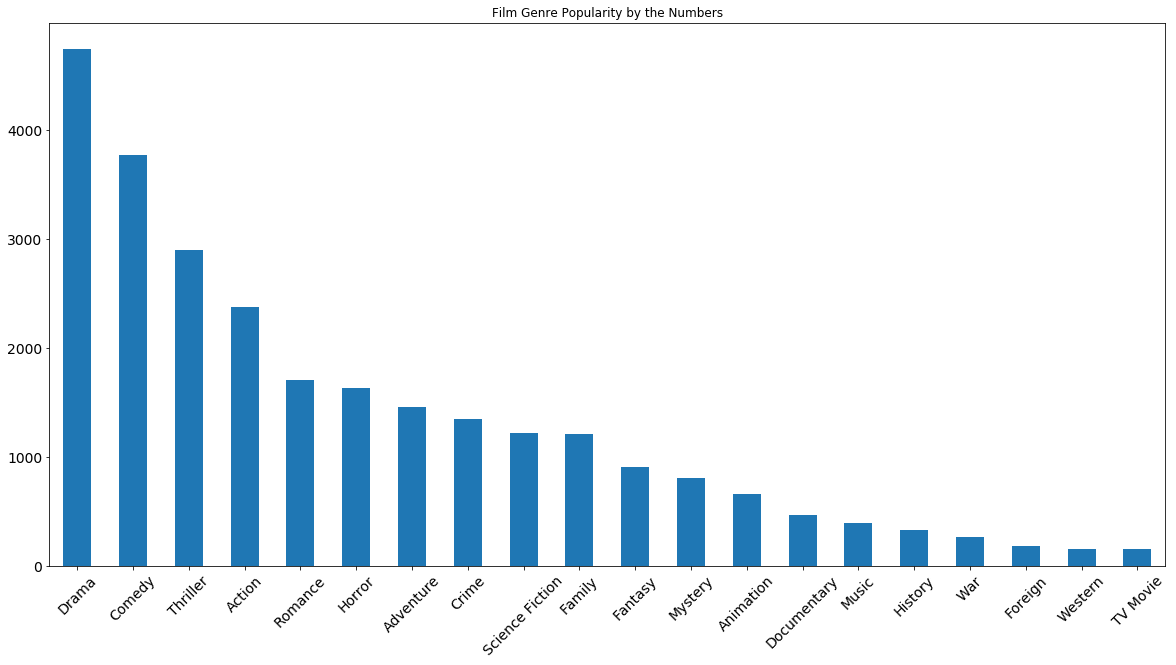

In [13]:
# Concatenate the strings in the genre column, make them into a series,
# then count and plot the distinct values
film_genres = df.genres.str.cat(sep='|')
film_genres = pd.Series(film_genres.split('|'))
film_genre_counts = film_genres.value_counts()
film_genre_counts.plot(figsize=(20,10), kind='bar')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.title('Film Genre Popularity by the Numbers');

Here we have our twenty unique genres! It seems that 'Drama' is the clear category leader in the dataset, present in nearly a thousand more films than 'Comedy', the second most common genre. The third most common genre is 'Thriller', and 'Action', surprisingly, is only the fourth most common. Next is 'Romance' in fifth place, and, equally surprisingly, 'Horror' in sixth place, which follows 'Romance' by only a small margin of difference. I also wasn't expecting 'Crime' to be counted as a unique genre, but it's present in more films than 'Science Fiction' and its runner-up 'Family', which are almost equally common genres.

In [14]:
# Get the values for the years of release, and sort them chronologically
release_years = df.release_year.unique()

# Bring the film genres and the release years together into a dictionary, using a loop
genre_counts = {}
for year in release_years:
    genres_per_year = df[df.release_year.isin([year])]
    genres_per_year = genres_per_year.genres.str.cat(sep='|')
    genres_per_year = pd.Series(genres_per_year.split('|'))
    genres_per_year = genres_per_year.value_counts()
    genre_counts[year] = genres_per_year

In these lines of code we obtain the unique values from the 'release_year' column of the dataset. Next, we use the 'release_years' variable to create a dictionary of key-value pairs stored in the variable 'genre_counts' with the release years as the keys, and the total numbers of each genre in each year as the values.

Now, to plot the information.

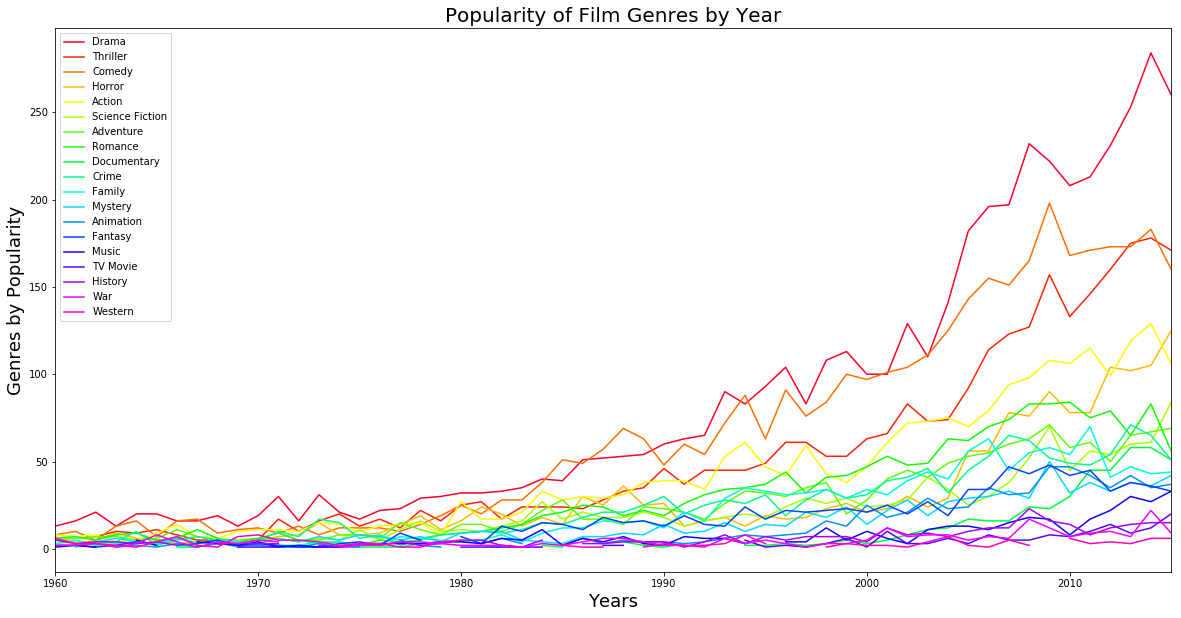

In [15]:
# Create a new dataframe using the dictionary, with years as columns and genres as rows
df_genres_by_year = pd.DataFrame()
for k, v in genre_counts.items():
    df_genres_by_year[k] = v

# Switch the genres and the years using the'transpose' method, and sort the values to match
df_genres_by_year = df_genres_by_year.transpose()
df_genres_by_year = df_genres_by_year.sort_index()

# Plot the resulting information in a line graph
ax = df_genres_by_year.plot(figsize=(20,10), kind='line', colormap='gist_rainbow')
ax.set_title('Popularity of Film Genres by Year', fontsize=20)
ax.set_xlabel('Years', fontsize=18)
ax.set_ylabel('Genres by Popularity', fontsize=18);

This line chart clearly shows that, in the dataset, in the 1960s the film genres are almost equally common. But over time, a large gap grows between the number of genres represented in each film, and the most popular film genres rise high above the rest, even as the total number of films recorded in the dataset increases. The chart shows that 'Drama' is still the most common genre, but now the difference between 'Drama' and the rest of the genres is even more stark, and it has seen the most explosive gains in representation - so it seems that drama films have become exponentially more popular over the decades.

The 'Comedy' and 'Thriller' categories have also enjoyed an exponential rise, and while they don't lead by as wide a margin as 'Drama', by the 2010s they are still high above the other genres. Interestingly, 'Comedy' has an advantage over 'Thriller' beginning around 1988, but loses it around 2013, when the two overlap before 'Comedy' has a brief spike in popularity, then suddenly declines to fall below 'Thriller' by 2015.

The 'Western' genre is not only the second-to-least common, but has also remained stagnant in popularity across the chronological spectrum of the dataset, with very little change. The line breaks suggest that in many years, 'Western' isn't represented at all. 'TV Movie', the least common category, has had at least a little fluctuation in popularity over time, and even has an increase in representation in the late 2000s.

Speaking of which, around 2008-2009, almost all the film genres spike in popularity, which suggests that a larger number of films of all genres were being released at that time. This coincides with the period right before the United States economic recession, and accordingly, the number of films containing almost all genres drops shortly afterward.

A few film genres escape the 2010 drop in popularity - 'Action' declines much less than the categories that are more popular, and 'Romance' doesn't drop in popularity at all until after 2010, when it declines slightly before starting to recover around 2015. Then, in 2015, the 'Romance' genre is abruptly overtaken by 'Science Fiction', which ends the recorded period as the sixth most popular genre.

Also in 2015, after gradually rising since the year 2000, 'Horror' surpasses 'Action' in popularity! Very intriguing, for a film category that is historically dismissed by critics and 'serious' filmgoers.

### 2. What is the relationship between a movie's budget, revenue and popularity score?

Here we can try something interesting - look for a connection between three columns of data, and see if any patterns emerge. A bubble chart will work nicely for this purpose. The size of the bubbles will be determined by the popularity score; the higher the score, the larger the bubble. The Matplotlib colormap 'prism' will be selected here, because the color range makes the individual bubbles easier to distinguish.

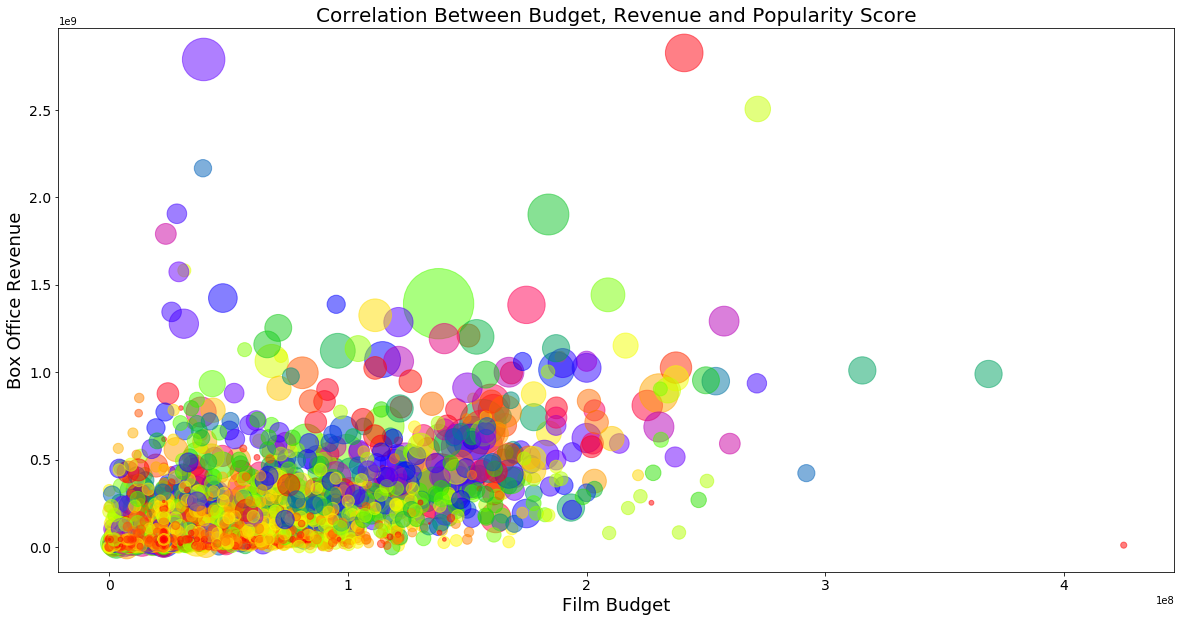

In [16]:
# Make a bubble chart with 'popularity' as the size determinant
plt.figure(figsize=(20,10))
cm = plt.cm.get_cmap('prism')
plt.scatter(df.budget_adj, df.revenue_adj, s=df.popularity*150, c=df.popularity,
            cmap=cm, alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Film Budget', fontsize=18)
plt.ylabel('Box Office Revenue', fontsize=18)
plt.title('Correlation Between Budget, Revenue and Popularity Score', fontsize=20)
plt.show()

Interesting - most of the data points representing the 10,865 films are clustered towards the bottom left of the chart, which indicates that most film budgets don't rise above the 200-million-dollar mark, and most film profits stay below the 1-billion-dollar mark. The outliers, however, go very far beyond the rest of the data points on both the x- and y-axis.

The single bubble representing the film with the largest budget, far out to the right beyond the 400-million-dollar mark, is one of the films with the lowest popularity scores, judging by the relative size of its bubble. It also made one of the lowest profits. The two runner-ups in budget, which lie between the 300- and 400-million marks, both show larger popularity scores than the average, but made only modest profits relative to the rest of the films.

The two films that made more than 2.5 billion dollars at the box office have markedly higher popularity scores than the three films with the biggest budgets - although the highest popularity score belongs to the one with the smallest budget, just below 50 million dollars. The one film just below the 2.5-million-mark, which has the largest budget of the top three outliers on the y-axis, also has the smallest popularity score by size.

A film which clearly has one of the largest popularity scores sits around a 140-million-dollar budget, and below 1.5 billion dollars in profits, right on the edge of the main cluster of data points. In fact, it looks like that region of cost and revenue, and the dollar amounts below it, have the greatest correlation with higher popularity scores. A number of other high-popularity films are visible towards the right edge of the main cluster, which have budgets between only 100-200 million and profits close to only 500 million.

Film budgets up to 260 million dollars which also have box office revenues around or above 800 million dollars look to be strongly correlated with good popularity. Beyond that point, though, the connection between film budget, profits and popularity score gets more tenuous.

<a id='conclusions'></a>
## Conclusions

The findings of this investigation are in no way absolute - the database from which the information was drawn may only provide hindsight, and many films may be missing from it which would change the results. No statistical analysis was performed using the data in the charts; the conclusions here are visual inferences.

The representation by numbers of film genres over time seems to indicate that the number of movies produced overall has risen through the years - and that the box office is has become largely dominated by the top five or six genres. If the numbers reflect demand, then it appears that filmmakers and filmgoers both gravitate most toward genres that produce high emotion - dramas, thrillers, comedies, horror films, action films - and continue to explore films that reflect those strong emotional highs and lows in greater amounts.

An examination of the bubble chart points to the idea that, while there are films with exorbitant budgets and extremely high revenues, most film budgets and profits don't stray beyond a certain margin, indicated by the cluster on the lower left of the graph. But on the right edge of that cluster, where filmmakers are willing to spend a hundred or two hundred million more than most, and where the profits rise above six hundred million - that seems to be where films are rated best by the audiences who use the database. It would appear that putting some extra effort into the making of a film, and the selling of it, may pay good returns in the form of audience interest.

In [17]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0